In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv(r'/Users/sk/Library/Mobile Documents/com~apple~CloudDocs/3. Techno (Professional)/21. Prj2_Transformer based Comment analyzer Chrome Plugin/ Prj2_CodeFile/data/dataset.csv')
df.head()

,Unnamed: 0,clean_comment,category
0,0,family mormon have never tried explain them t...,1
1,1,buddhism has very much lot compatible with chr...,1
2,2,seriously don say thing first all they won get...,-1
3,3,what you have learned yours and only yours wha...,0
4,4,for your own benefit you may want read living ...,1


In [4]:
df.dropna(inplace = True)

In [5]:
df.drop_duplicates(inplace = True)

In [14]:
df = df[~(df['clean_comment'].str.strip() == '')]

In [15]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [16]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [17]:
# Ensure necessary NLTK data is downloaded
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1006)>
[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1006)>


False

In [18]:
# Define the preprocessing function

def preprocess_comment(comment):
    # Convert to lowercase
    comment = comment.lower()

    # Remove trailing and leading whitespaces
    comment = comment.strip()

    # Remove newline characters
    comment = re.sub(r'\n', '',comment)

    # Remove non-alphanumeric characters, except punctuation
    comment = re.sub(r'[^A-Za-z0-9\s!?.,]', '', comment)

    # Remove stopwords but retain important one for sentiment analysis
    stop_words = set(stopwords.words('english')) - {'not', 'but', 'however', 'no', 'yet'}
    comment = ' '.join([word for word in comment.split() if word not in stop_words])

    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    comment = ' '.join([lemmatizer.lemmatize(word) for word in comment.split()])
    return comment

In [19]:
# Applying the function
df['clean_comment'] = df['clean_comment'].apply(preprocess_comment)

In [20]:
df.head()

,Unnamed: 0,clean_comment,category
0,0,family mormon never tried explain still stare ...,1
1,1,buddhism much lot compatible christianity espe...,1
2,2,seriously say thing first get complex explain ...,-1
3,3,learned want teach different focus goal not wr...,0
4,4,benefit may want read living buddha living chr...,1


In [36]:
%pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# Step 1 -> Vectorize the comments using Bag of Words(count vectorizer)
vectorizer = CountVectorizer(max_features = 5000) # Bag of Words model with a limit of 1000 features

In [39]:
x = vectorizer.fit_transform(df['clean_comment']).toarray()
y = df['category'] # Assuming the sentiment is the target variable (0 or 1 for binary classification)

In [40]:
x[0]

array([0, 0, 0, ..., 0, 0, 0], shape=(5000,))

In [41]:
x.shape

(36878, 5000)

In [42]:
y

0        1
1        1
2       -1
3        0
4        1
        ..
37244    0
37245    1
37246    0
37247    1
37248    0
Name: category, Length: 36878, dtype: int64

In [43]:
y.shape

(36878,)

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y)

In [30]:
n_estimators = 150
max_depth = 15
model  = RandomForestClassifier(n_estimators = n_estimators, max_depth = max_depth, random_state = 42)
model.fit(x_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",150
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",15
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y

In [31]:
y_pred = model.predict(x_test)

In [32]:
y_pred

array([1, 1, 1, ..., 1, 1, 0], shape=(7376,))

In [33]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6519793926247288

In [34]:
classification_rep = classification_report(y_test, y_pred, output_dict = True)

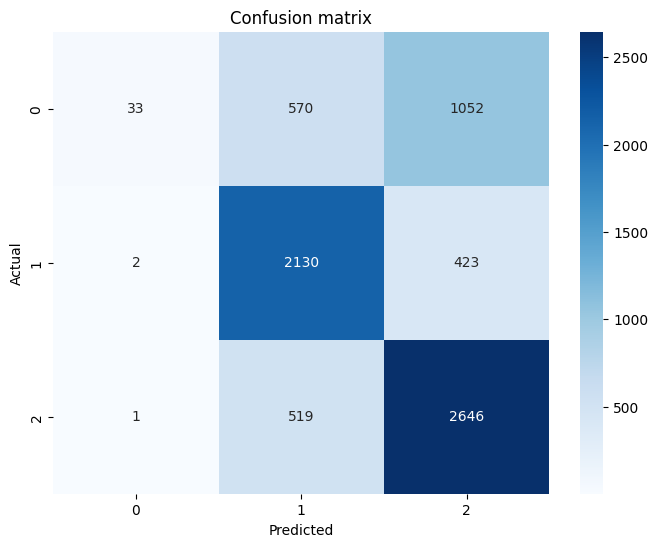

In [35]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8, 6))
sns.heatmap(conf_matrix, annot = True, fmt = "d", cmap = "Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix")
plt.show()

In [95]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       1.00      0.02      0.04      1650
           0       0.66      0.85      0.74      2555
           1       0.64      0.82      0.72      3154

    accuracy                           0.65      7359
   macro avg       0.77      0.56      0.50      7359
weighted avg       0.73      0.65      0.58      7359



- Data imbalanced hone ke karan recall bahut kharab hai negative class ka

In [251]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, InputLayer

In [265]:
model = Sequential()
model.add(InputLayer(shape = (5000,)))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

In [267]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                │ (None, 512)            │     2,560,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,735,171 (10.43 MB)

 Trainable params: 2,735,171 (10.43 MB)

 Non-trainable params: 0 (0.00 B)

In [269]:
y_train = y_train + 1
y_test = y_test + 1

In [271]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [273]:
model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
920/920 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.6851 - loss: 0.7274
Epoch 2/10
920/920 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9107 - loss: 0.2602
Epoch 3/10
920/920 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9620 - loss: 0.1216
Epoch 4/10
920/920 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9838 - loss: 0.0570
Epoch 5/10
920/920 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9901 - loss: 0.0410
Epoch 6/10
920/920 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9917 - loss: 0.0341
Epoch 7/10
920/920 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9942 - loss: 0.0237
Epoch 8/10
920/920 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9947 - loss: 0.0202
Epoch 9/10
920/920 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9942 - loss: 0.0232
Epoch 10/10
920/920 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9953 - loss: 0.0185


In [275]:
y_pred = model.predict(x_test)

230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [277]:
y_pred[1]

array([0.5107539, 0.4822774, 0.0069688], dtype=float32)

In [279]:
y_pred = y_pred.round()

In [281]:
y_pred[200]

array([0., 0., 1.], dtype=float32)

In [283]:
y_pred  = y_pred.argmax(axis=1)

In [285]:
y_pred[200]

2

In [287]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.74      0.72      1650
           1       0.86      0.87      0.87      2555
           2       0.86      0.84      0.85      3154

    accuracy                           0.83      7359
   macro avg       0.81      0.81      0.81      7359
weighted avg       0.83      0.83      0.83      7359



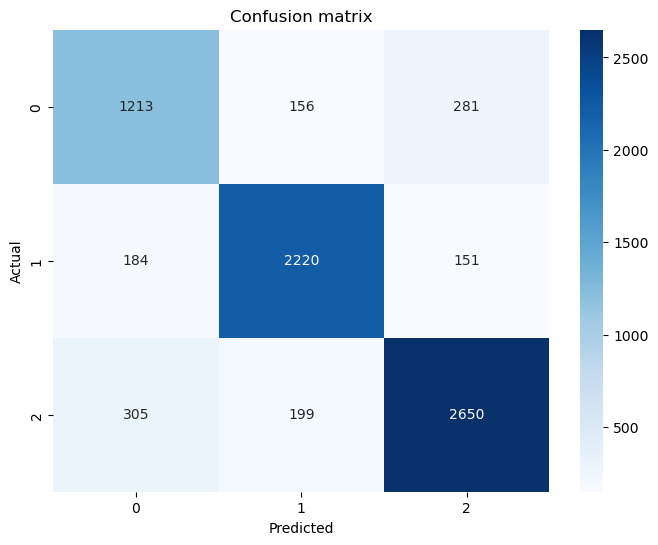

In [289]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8, 6))
sns.heatmap(conf_matrix, annot = True, fmt = "d", cmap = "Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix")
plt.show()

In [45]:
# Training these models after aplying adasyn again